**we'll learn to analyze customer reviews for an online women's clothing shop. Our task is determining which clothing category (Tops, Bottoms, Jackets, Dresses, or Intimate) has higher customer satisfaction. The data consists of text reviews, and we'll use Python with pandas for data manipulation and the NLTK module for text preprocessing and sentiment analysis. Prior knowledge of Python and pandas is required. By the end of the course, learners will gain practical experience in text data analysis and customer sentiment evaluation.**

**- 
Loading the customer reviews datase**t
- 
•
Clean and preprocess the reve	- 

•
Tokenize the reviews and removing the stoo- rds

•
Practice Task - Text Cleaning and Prepc- essing

•
Exploring the tokens and produtc- ategories

•
Extracting the adjective n-  the reviews

•
Finding the sentiet-  of each review

•
Challenge Task - Cuomer Review Analysis *

In [4]:
#!/bin/bash
!pip install kaggle
!kaggle datasets download nicapotato/womens-ecommerce-clothing-reviews

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ------------------- -------------------- 41.0/82.7 kB ? eta -:--:--
     ------------------- -------------------- 41.0/82.7 kB ? eta -:--:--
     -------------------------------------  81.9/82.7 kB 508.4 kB/s eta 0:00:01
     -------------------------------------  81.9/82.7 kB 508.4 kB/s eta 0:00:01
     -------------------------------------  81.9/82.7 kB 508.4 kB/s eta 0:00:01
     -------------------------------------  81.9/82.7 kB 508.4 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 220.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105796 sha256=d8a2cab698c1b0c4e1adefdbe35602ea7f94011347da119b07b53cf3f0b9ff29
  Stored in directory: c:\users\administrator\appdata\local\pip\cache\wheels\ff\55\fb\b27a466be754d2a06ffe0e37b248d844f090a63b51


  0%|          | 0.00/2.79M [00:00<?, ?B/s]
 36%|###5      | 1.00M/2.79M [00:03<00:05, 342kB/s]
 72%|#######1  | 2.00M/2.79M [00:05<00:02, 387kB/s]
100%|##########| 2.79M/2.79M [00:07<00:00, 404kB/s]
100%|##########| 2.79M/2.79M [00:07<00:00, 393kB/s]


In [5]:
import zipfile

with zipfile.ZipFile("womens-ecommerce-clothing-reviews.zip", 'r') as zip_ref:
    zip_ref.extractall("womens-ecommerce-clothing-reviews")

Load the dataset

In [11]:
import pandas as pd
df = pd.read_csv('womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [12]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [13]:
df.info

<bound method DataFrame.info of        Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482              

In [14]:
df['Class Name'].value_counts()

Class Name
Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64

In [15]:
df['Department Name'].value_counts()

Department Name
Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: count, dtype: int64

In [33]:
data = df[['Department Name', 'Review Text', 'Rating']]
data.head()

,Department Name,Review Text,Rating
0,Intimate,Absolutely wonderful - silky and sexy and comf...,4
1,Dresses,Love this dress! it's sooo pretty. i happene...,5
2,Dresses,I had such high hopes for this dress and reall...,3
3,Bottoms,"I love, love, love this jumpsuit. it's fun, fl...",5
4,Tops,This shirt is very flattering to all due to th...,5


In [34]:
data.isnull().sum()

Department Name     14
Review Text        845
Rating               0
dtype: int64

In [35]:
data = data.dropna()
print(data.isnull().sum())
data.head()

Department Name    0
Review Text        0
Rating             0
dtype: int64


,Department Name,Review Text,Rating
0,Intimate,Absolutely wonderful - silky and sexy and comf...,4
1,Dresses,Love this dress! it's sooo pretty. i happene...,5
2,Dresses,I had such high hopes for this dress and reall...,3
3,Bottoms,"I love, love, love this jumpsuit. it's fun, fl...",5
4,Tops,This shirt is very flattering to all due to th...,5


In [52]:
data['Review Text'][7]

"I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size..."

**Step 2: Clean and Preprocess the Reviews**

- Convert all text to lowercase to maintain consistency.

- Remove any punctuation, special characters, or unwanted symbols.

- Handle any missing values in review_text if present.

In [53]:
import re

data['Review Text'] = data['Review Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))
data['Review Text'][7]

'i ordered this in carbon for store pick up and had a ton of stuff as always to try on and used this top to pair skirts and pants everything went with it the color is really nice charcoal with shimmer and went well with pencil skirts flare pants etc my only compaint is it is a bit big sleeves are long and it doesnt go in petite also a bit loose for me but no xxs so i kept it and wil ldecide later since the light color is already sold out in hte smallest size'

**Step 3: Tokenize the Reviews and Remove Stopwords**

- Tokenize the text data using NLTK.

- Remove stopwords to keep only meaningful words in the analysis.

In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [56]:
 data['Tokens'] = data['Review Text'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])
data['Tokens']

0        [absolutely, wonderful, silky, sexy, comfortable]
1        [love, dress, sooo, pretty, happened, find, st...
2        [high, hopes, dress, really, wanted, work, ini...
3        [love, love, love, jumpsuit, fun, flirty, fabu...
4        [shirt, flattering, due, adjustable, front, ti...
                               ...                        
23481    [happy, snag, dress, great, price, easy, slip,...
23482    [reminds, maternity, clothes, soft, stretchy, ...
23483    [fit, well, top, see, never, would, worked, im...
23484    [bought, dress, wedding, summer, cute, unfortu...
23485    [dress, lovely, platinum, feminine, fits, perf...
Name: Tokens, Length: 22628, dtype: object

**Step 5: Exploring the Tokens and Product Categories**

- Group by Category and explore the distribution of tokens for each category.

- Visualize the frequency of words in each category to identify common themes.

<Axes: title={'center': 'Clothing Category Distribution'}, xlabel='Department Name'>

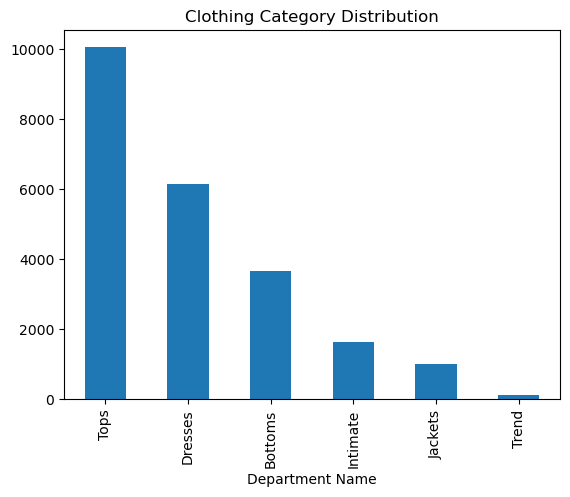

In [71]:
data['Department Name'].value_counts().plot(kind='bar', title='Clothing Category Distribution')


**Step 6: Extracting Adjectives in the Reviews**

- Use POS (part-of-speech) tagging to extract adjectives, as these often convey opinions.

- NLTK’s pos_tag function is helpful here to identify adjectives.

In [58]:
from nltk import pos_tag

def extract_adjectives(tokens):
    tagged_words = pos_tag(tokens)
    return [word for word, tag in tagged_words if tag in ['JJ', 'JJR', 'JJS']]

data['Adjectives'] = data['Tokens'].apply(extract_adjectives)


In [59]:
data['Adjectives'][:10]

0                      [wonderful, silky, comfortable]
1           [find, online, love, little, true, petite]
2    [high, wanted, petite, small, usual, small, sm...
3                              [fabulous, wear, great]
4           [due, adjustable, perfect, wear, cardigan]
5    [reese, tall, full, small, narrowing, embellis...
6                 [last, teh, gorgeous, little, baggy]
7    [pick, top, nice, pencil, flare, big, long, lo...
8                  [xs, little, snug, feminine, usual]
9    [petite, sure, wear, regular, less, busty, sma...
Name: Adjectives, dtype: object

**Step 7: Finding the Sentiment of Each Review**

- Calculate sentiment scores for each review using NLTK’s SentimentIntensityAnalyzer or other sentiment analysis tools.

In [61]:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


In [65]:
data['Sentiment'] = data['Review Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [66]:
data[:10]

,Department Name,Review Text,Rating,Tokens,Adjectives,Sentiment
0,Intimate,absolutely wonderful silky and sexy and comfo...,4,"[absolutely, wonderful, silky, sexy, comfortable]","[wonderful, silky, comfortable]",0.8932
1,Dresses,love this dress its sooo pretty i happened t...,5,"[love, dress, sooo, pretty, happened, find, st...","[find, online, love, little, true, petite]",0.9719
2,Dresses,i had such high hopes for this dress and reall...,3,"[high, hopes, dress, really, wanted, work, ini...","[high, wanted, petite, small, usual, small, sm...",0.9398
3,Bottoms,i love love love this jumpsuit its fun flirty ...,5,"[love, love, love, jumpsuit, fun, flirty, fabu...","[fabulous, wear, great]",0.4805
4,Tops,this shirt is very flattering to all due to th...,5,"[shirt, flattering, due, adjustable, front, ti...","[due, adjustable, perfect, wear, cardigan]",0.9162
5,Dresses,i love tracy reese dresses but this one is not...,2,"[love, tracy, reese, dresses, one, petite, 5, ...","[reese, tall, full, small, narrowing, embellis...",0.9419
6,Tops,i aded this in my basket at hte last mintue to...,5,"[aded, basket, hte, last, mintue, see, would, ...","[last, teh, gorgeous, little, baggy]",0.4576
7,Tops,i ordered this in carbon for store pick up and...,4,"[ordered, carbon, store, pick, ton, stuff, alw...","[pick, top, nice, pencil, flare, big, long, lo...",-0.0909
8,Dresses,i love this dress i usually get an xs but it r...,5,"[love, dress, usually, get, xs, runs, little, ...","[xs, little, snug, feminine, usual]",0.7175
9,Dresses,im 55 and 125 lbs i ordered the s petite to ma...,5,"[im, 55, 125, lbs, ordered, petite, make, sure...","[petite, sure, wear, regular, less, busty, sma...",-0.3724


In [69]:
data.Sentiment.describe()

count    22628.000000
mean         0.729986
std          0.372637
min         -0.956300
25%          0.700300
50%          0.885000
75%          0.947900
max          0.995900
Name: Sentiment, dtype: float64

**Step 8: Challenge Task – Customer Review Analysis**
- Summarize which category has the highest average sentiment score and use the rating column to cross-check.

- Generate a visualization to display average customer satisfaction by category.


<Axes: title={'center': 'Average Sentiment by Clothing Category'}, xlabel='Department Name'>

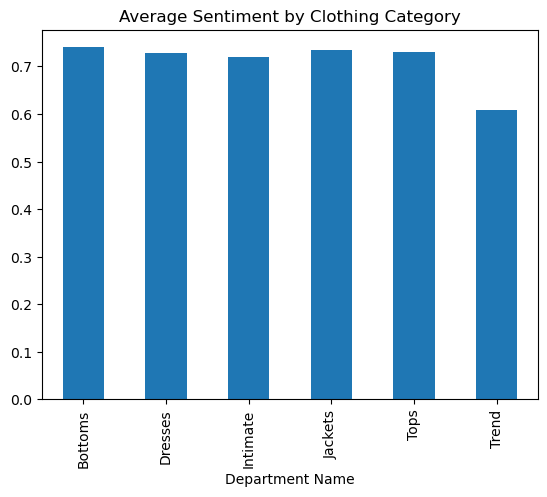

In [70]:
avg_sentiment = data.groupby('Department Name')['Sentiment'].mean()
avg_sentiment.plot(kind='bar', title='Average Sentiment by Clothing Category')
